1.Take a iris dataset of multiple classes.

2.From the dataset, define your training set, target variable, test set, and splitting.    

3.The SVC() function can be used to fit a support vector classifier when the argument kernel="linear" is used.  We will use SVC() function from sklearn.svm.SVC library to create our classifier model using fit() method on the training data set.

# Support vector classifier
cls = SVC().fit(X_train, y_train)

4.Report the classification accuracy:
accuracy_score(target_actual_value,target_predicted_value)

5.Experiments: (i) Report the performance of the SVC comparing linear kernel, polynomial kernel, Radial basis function kernel, and sigmoid function (ii) Draw the ROC for only linear and polynomial kernel (iii) Plot the confusion matrix for which you got the highest accuracy (iii) Identify hyper parameter of SVC and show the effect of hyper parameter on your dataset.

6.Reference helping code: https://www.kaggle.com/code/just4jcgeorge/svm-hands-on-lab, https://www.science.smith.edu/~jcrouser/SDS293/labs/lab15-py.html

In [107]:
# Import necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

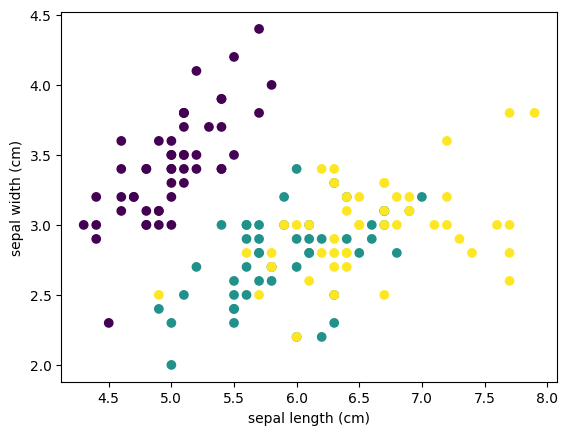

In [108]:
# Take a iris dataset of multiple classes
iris = datasets.load_iris()

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

# plot the data
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

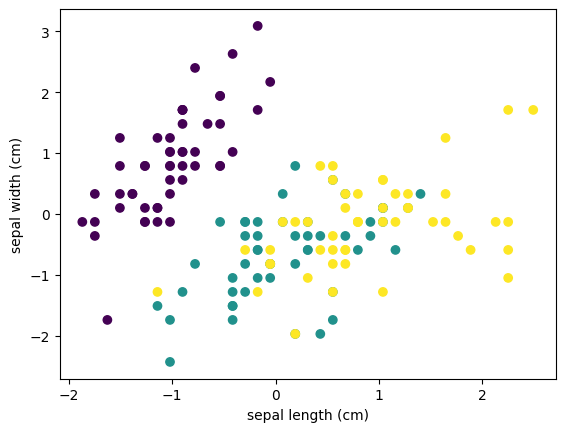

In [109]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.head()

# plot the data
plt.scatter(scaled_data['sepal length (cm)'], scaled_data['sepal width (cm)'], c=iris.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [110]:
# From the dataset, define your training set, target variable, test set, and splitting
X = scaled_data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [111]:
# Train the model
model = SVC()
model.fit(X_train, y_train)

# Predict the model
predictions = model.predict(X_test)
print(y_test.shape)
print(predictions.shape)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))

(30,)
(30,)
Accuracy: 1.0


In [112]:
# Report the performance of the SVC comparing linear kernel, polynomial kernel, Radial basis function kernel, and sigmoid function kernel.Increase the c parameter and report the performance.
# Define kernel functions to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a dictionary to store accuracy for each kernel
accuracy_dict = {}

# Iterate through each kernel and evaluate the classifier
for kernel in kernels:
    cls = SVC(kernel=kernel)
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[kernel] = accuracy

# print the accuracy for each kernel
print(accuracy_dict)


{'linear': 0.9666666666666667, 'poly': 0.9666666666666667, 'rbf': 1.0, 'sigmoid': 0.9}


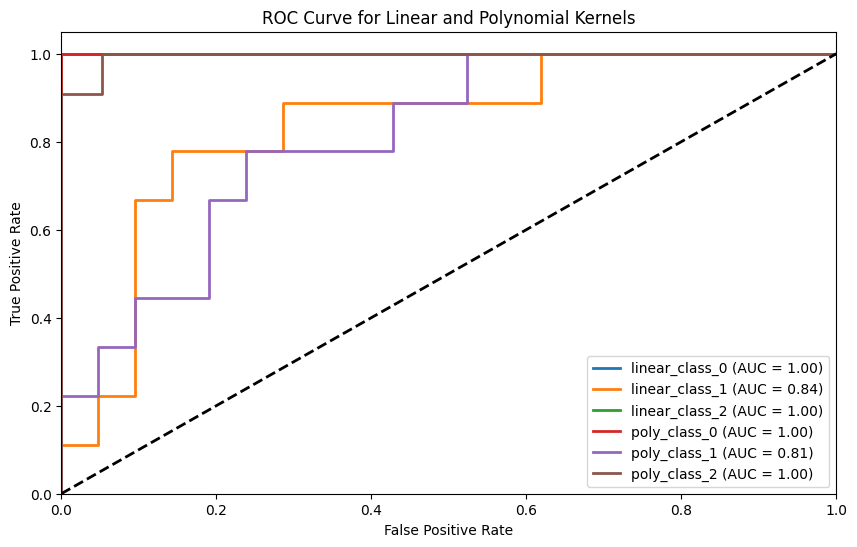

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the target variables for one-vs-all classification
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernel functions to evaluate (linear and polynomial)
kernels = ['linear', 'poly']

# Create a dictionary to store ROC curves
roc_curves = {}

# Iterate through each kernel and class
for kernel in kernels:
    for i in range(n_classes):
        # Create an SVC classifier with the current kernel
        cls = OneVsRestClassifier(SVC(kernel=kernel, probability=True))
        
        # Fit the classifier on the training data for the current class
        cls.fit(X_train, y_train[:, i])
        
        # Predict probabilities for the positive class
        y_score = cls.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve and ROC area for the current class
        fpr, tpr, _ = roc_curve(y_test[:, i], y_score)
        roc_auc = auc(fpr, tpr)
        
        # Store the ROC curve and AUC in the dictionary
        roc_curves[f'{kernel}_class_{i}'] = (fpr, tpr, roc_auc)

# Plot ROC curves for linear and polynomial kernels
plt.figure(figsize=(10, 6))
for kernel in kernels:
    for i in range(n_classes):
        fpr, tpr, roc_auc = roc_curves[f'{kernel}_class_{i}']
        plt.plot(fpr, tpr, lw=2, label=f'{kernel}_class_{i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear and Polynomial Kernels')
plt.legend(loc="lower right")
plt.show()


Highest Accuracy (linear kernel): 1.0000


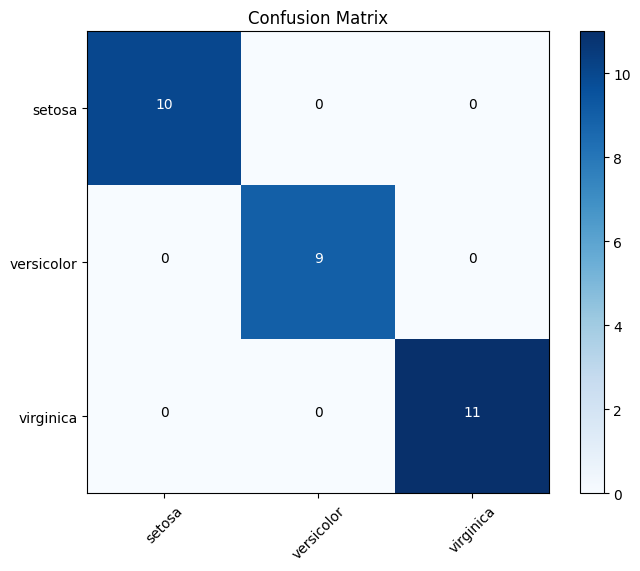

In [114]:
from sklearn.metrics import confusion_matrix
from itertools import product

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Define kernel functions to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a dictionary to store accuracy for each kernel
accuracy_dict = {}

# Iterate through each kernel and evaluate the classifier
for kernel in kernels:
    cls = SVC(kernel=kernel)
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[kernel] = accuracy

# Determine the kernel with the highest accuracy
best_kernel = max(accuracy_dict, key=accuracy_dict.get)

# Create an SVC classifier with the best kernel
cls = SVC(kernel=best_kernel)
cls.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cls.predict(X_test)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Highest Accuracy ({best_kernel} kernel): {accuracy:.4f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

# Labeling the axes
classes = iris.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate with the counts in each cell
thresh = conf_matrix.max() / 2.
for i, j in product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

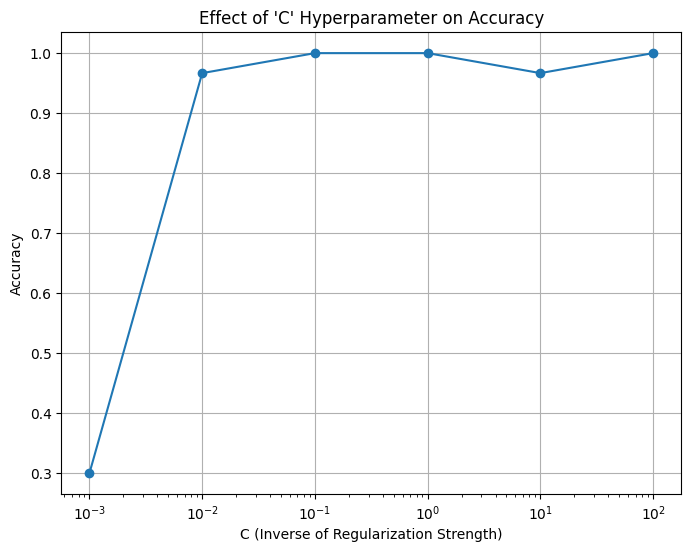

In [115]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    cls = SVC(kernel=best_kernel, C=C)
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the effect of 'C' hyperparameter on accuracy
plt.figure(figsize=(8, 6))
plt.semilogx(C_values, accuracies, marker='o')
plt.title("Effect of 'C' Hyperparameter on Accuracy")
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()